In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import * # Machine learning tools
import imblearn  # Resampling
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import ConfusionMatrixDisplay # Model evaluation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
from sklearn.metrics import classification_report # Model evaluation report
from sklearn.metrics import classification_report
import shap
from shap.plots import beeswarm

In [4]:
#Working directory

#df = pd.read_excel('/home/dsg/vortex/PRODUCTION/DATA/processed/training_data.xlsx'',sheet_name='can_tintorer', engine='openpyxl')
#df = pd.read_excel('/home/dsg/vortex/PRODUCTION/DATA/processed/training_data.xlsx'',sheet_name='encinsasola', engine='openpyxl') 
df = pd.read_excel('/home/dsg/vortex/PRODUCTION/DATA/processed/training_data.xlsx',sheet_name='aliste', engine='openpyxl')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Al           2256 non-null   float64
 1   Si           2256 non-null   float64
 2   P            2256 non-null   float64
 3   S            2256 non-null   float64
 4   Cl           2256 non-null   float64
 5   K            2256 non-null   float64
 6   Ca           2256 non-null   float64
 7   Sc           2256 non-null   float64
 8   Ti           2256 non-null   float64
 9   V            2256 non-null   float64
 10  Cr           2256 non-null   float64
 11  Mn           2256 non-null   float64
 12  Fe           2256 non-null   float64
 13  Co           2256 non-null   float64
 14  Ni           2256 non-null   float64
 15  Cu           2256 non-null   float64
 16  Zn           2256 non-null   float64
 17  Ga           2256 non-null   float64
 18  Ge           2256 non-null   float64
 19  As    

In [5]:
#Some basic Feature engineering
df = df.drop(['Site', 'suma'], axis=1)
#Comprobamos que no hay valores faltantes
# Checking missing values
df.isnull().any().any()


False

In [6]:
# Distribución en el target_Group
# More Exploratory Analysis
target = df['target_PDLC'].value_counts()
target

target_PDLC
0    1504
1     752
Name: count, dtype: int64

In [7]:
X = df.drop(['target_PDLC'], axis=1)
y = df['target_PDLC']

target_PDLC
1    1504
0    1504
Name: count, dtype: int64

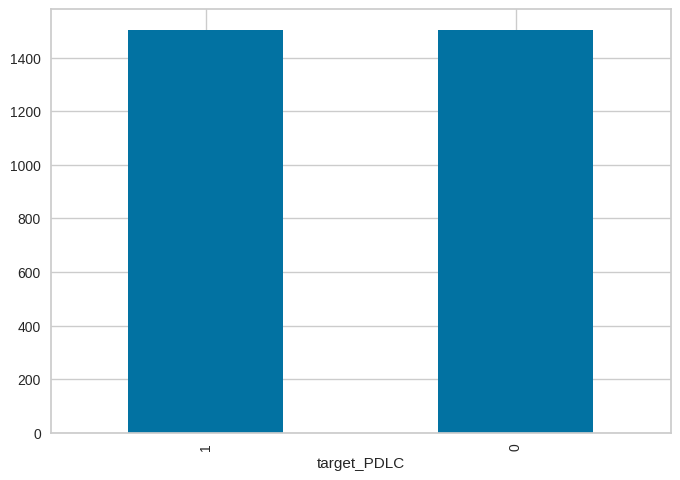

In [8]:
# oversampling strategy
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

y_smote.value_counts().plot(kind='bar')
#plt.savefig('SMOTE_distribution.png',dpi=200, bbox_inches='tight')
y_smote.value_counts()

In [12]:
# Creating final resampled dataset
data = X_smote
data['target'] = y_smote

In [13]:
data['target'].value_counts()

target
1    1504
0    1504
Name: count, dtype: int64

In [14]:
# Experiment setup 

experiment = setup(data=data, target= 'target',train_size=0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(3008, 45)"
4,Transformed data shape,"(3008, 45)"
5,Transformed train set shape,"(2406, 45)"
6,Transformed test set shape,"(602, 45)"
7,Numeric features,44
8,Preprocess,True
9,Imputation type,simple


In [15]:
remove_metric('MCC')
remove_metric('Kappa')
remove_metric('AUC')
#'AUC', , 'MCC'

In [16]:
rflocal = create_model('rf',n_estimators=200, min_samples_leaf=5, class_weight="balanced", criterion='entropy')


,Accuracy,Recall,Prec.,F1
Fold,,,,
0,0.9917,0.9917,0.9917,0.9917
1,0.9917,0.9833,1.0000,0.9916
2,0.9876,0.9833,0.9916,0.9874
3,0.9876,0.9835,0.9917,0.9876
4,0.9751,0.9752,0.9752,0.9752
5,0.9876,0.9835,0.9917,0.9876
6,0.9875,1.0000,0.9756,0.9877
7,0.9833,0.9833,0.9833,0.9833
8,0.9958,0.9917,1.0000,0.9958


### Local Shap Value Analysis

In [30]:
import shap
td = get_config(variable="X_train")
explainer = shap.Explainer(rflocal)
shap_values = explainer(td)


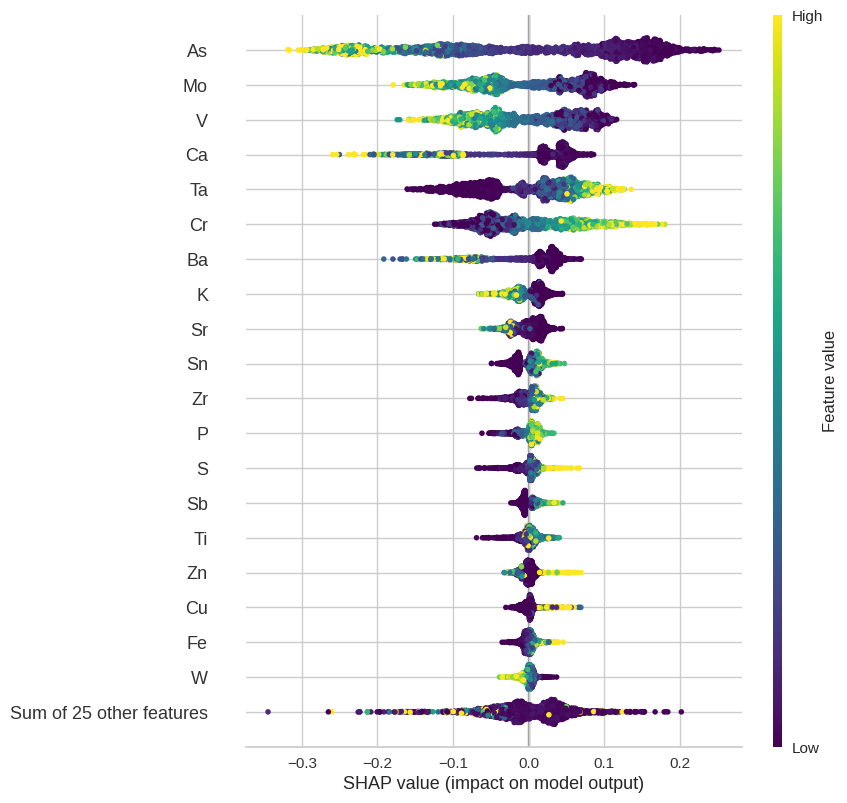

In [20]:
from shap.plots import beeswarm
beeswarm(shap_values[:,:,1],max_display=20, color=plt.get_cmap("viridis")) #save this plot


In [ ]:

shap.plots.beeswarm(shap_values[:,:,1], order=shap_values.abs.max(0))



In [ ]:
tuned_local_model = tune_model(rflocal, n_iter=10, tuner_verbose=False)#,return_tuner=True

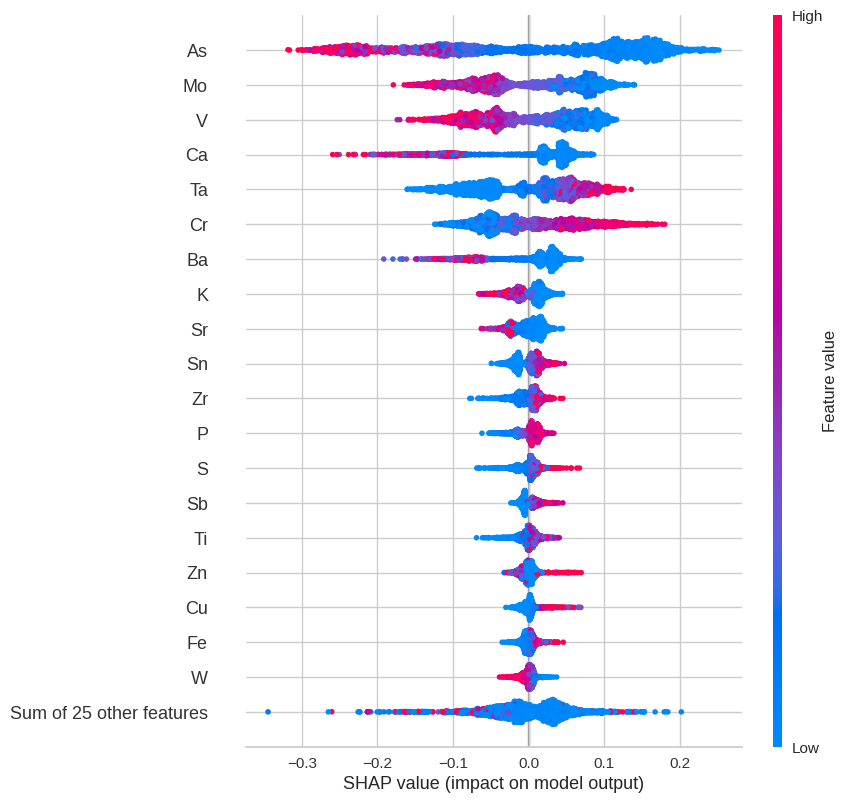

In [34]:

tuned_explainer = shap.Explainer(tuned_local_model)
tuned_shap = tuned_explainer(td)

beeswarm(tuned_shap[:,:,1],max_display=20,  color=plt.get_cmap("viridis")) #save this plot